In [206]:
import sys
print(sys.version)

3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 12:04:33) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [207]:
"""
Created on October 14 2018
@author: Neven Caplar
@contact: ncaplar@princeton.edu
"""

'\nCreated on October 14 2018\n@author: Neven Caplar\n@contact: ncaplar@princeton.edu\n'

In [208]:
%%javascript
try {
  require(['base/js/utils'], function (utils) {
    utils.load_extension('code_prettify/code_prettify');
    utils.load_extension('collapsible_headings/main'); 
    utils.load_extension('codefolding/edit'); 
    utils.load_extension('codefolding/main'); 
    utils.load_extension('execute_time/ExecuteTime');   
    utils.load_extension('toc2/main'); 
  });
}
catch (err) {
  console.log('toc2 load error:', err);
}

<IPython.core.display.Javascript object>

In [209]:
# make notebook nice and wide to fill the entire screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [210]:
#matplotlib
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
matplotlib.rcParams.update({'font.size': 22})
%config InlineBackend.rc = {}
%matplotlib inline

import numpy as np

DATA_DIRECTORY='/Users/nevencaplar/Documents/Variability/HSC/'

# Preparation of sql query

In [17]:
# I prepared this file in Wolfram Mathematica, from Shen catalogue - but this are just positions from DR7
PositionOfQuasars=np.loadtxt(DATA_DIRECTORY+'PositionOfQuasars.txt')
PositionOfQuasars=PositionOfQuasars


In [87]:
data = np.zeros(105783, dtype={'names':('ra', 'dec'),
                          'formats':('f8','f8')})

data['ra'] = PositionOfQuasars[:,0]
data['dec'] =  PositionOfQuasars[:,1]

PositionOfQuasars=data

In [88]:
np.save('/Users/nevencaplar/Documents/Variability/Silvermann/PositionOfQuasars',PositionOfQuasars)

In [89]:
# run 'python CatalogCreator.py PositionOfQuasars.npy --columns ["g_cmodel_mag","g_cmodel_mag"]'

In [ ]:
# this is example of the SQL query
# copy paste result from the CatalogCreator.py command into VALUES() bracket

"""
WITH
    user_catalog("user.ra","user.dec") AS (VALUES('2.7227999642500000e-02'::double precision,'5.1534098386799998e-01'::double precision),('3.3900000154999999e-02','2.7630099654200002e-01'),('3.8603998720599997e-02','1.5298477172900000e+01'),('3.9089001715200002e-02','1.3938449859600000e+01'),('3.9271000772700002e-02','-1.0464426040599999e+01'),('4.7548998147199997e-02','1.4929354667700000e+01'),('4.9839001148899997e-02','4.0364999324100002e-02'),('5.1079001277700001e-02','-5.3904700279200002e-01'),('5.4786998778600000e-02','1.4176302909900000e+01'),('5.7505998760499999e-02','-9.1300100088100000e-01'))
    ,
    match AS (
        SELECT
            object_id,
            earth_distance(coord, ll_to_earth("user.dec", "user.ra")) AS match_distance,
            user_catalog.*
        FROM
            user_catalog JOIN s18a_wide.forced
                ON coneSearch(coord, "user.ra", "user.dec", 0.5)
    )
SELECT
	ra,
	dec,
    g_cmodel_mag,
    r_cmodel_mag,
    i_cmodel_mag
FROM
    match LEFT JOIN s18a_wide.forced USING(object_id)
"""

# Analysis

In [46]:
#np.loadtxt('/Users/nevencaplar/Documents/Variability/Silvermann/179761.csv')
import pandas as pd
import numpy as np
from tqdm import tqdm

from sklearn.metrics.pairwise import euclidean_distances

df = pd.read_csv('/Users/nevencaplar/Documents/Variability/Silvermann/179761.csv')

Positions_of_df=np.transpose([df['# ra'].values,df['dec'].values])

In [99]:
#https://classic.sdss.org/dr7/products/value_added/qsocat_dr7.html
dr7 = pd.read_csv('/Users/nevencaplar/Documents/Variability/Silvermann/dr7qso.dat',skiprows=80,sep='\s+',engine='python', error_bad_lines=False, header=None )

Skipping line 305: Expected 75 fields in line 305, saw 76. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 1633: Expected 75 fields in line 1633, saw 76. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 1745: Expected 75 fields in line 1745, saw 76. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 1828: Expected 75 fields in line 1828, saw 76. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 3631: Expected 75 fields in line 3631, saw 76. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 4123: Expected 75 fields in line 4123, saw 76. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 4124: Expected 75 fields in line 4124, saw 76. Error could possibly be due to quotes bei

In [104]:
Positions_of_dr7=np.transpose([dr7[1].values,dr7[2].values])

In [106]:
# takes a bit less than 4 minutes on my laptopt
res=[]
for j in tqdm(range(len(Positions_of_dr7))):
    PositionOfQuasars_euclidean_distances=euclidean_distances([Positions_of_dr7[j]],Positions_of_df)
    for i in range(len(PositionOfQuasars_euclidean_distances)):
        res.append([np.min(PositionOfQuasars_euclidean_distances[i]),df.loc[list(PositionOfQuasars_euclidean_distances[i]).index(np.min(PositionOfQuasars_euclidean_distances[i]))].values])


  3%|▎         | 3650/105645 [00:07<03:41, 459.79it/s]Exception in thread Thread-9:
Traceback (most recent call last):
  File "/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

100%|██████████| 105645/105645 [03:38<00:00, 484.44it/s]


In [121]:
matched_array=[]
for i in tqdm(range(len(res))):
    if res[i][0]>0.001:
        pass
    else:
        matched_array.append(np.concatenate((dr7.loc[i][[1,2,8,9,10,11,12,13]],res[i][1])))
        
matched_array=np.array(matched_array)

100%|██████████| 105645/105645 [00:08<00:00, 12583.70it/s]


In [156]:
matched_array_filtered=matched_array[matched_array[:,2]>16]

(16, 24)

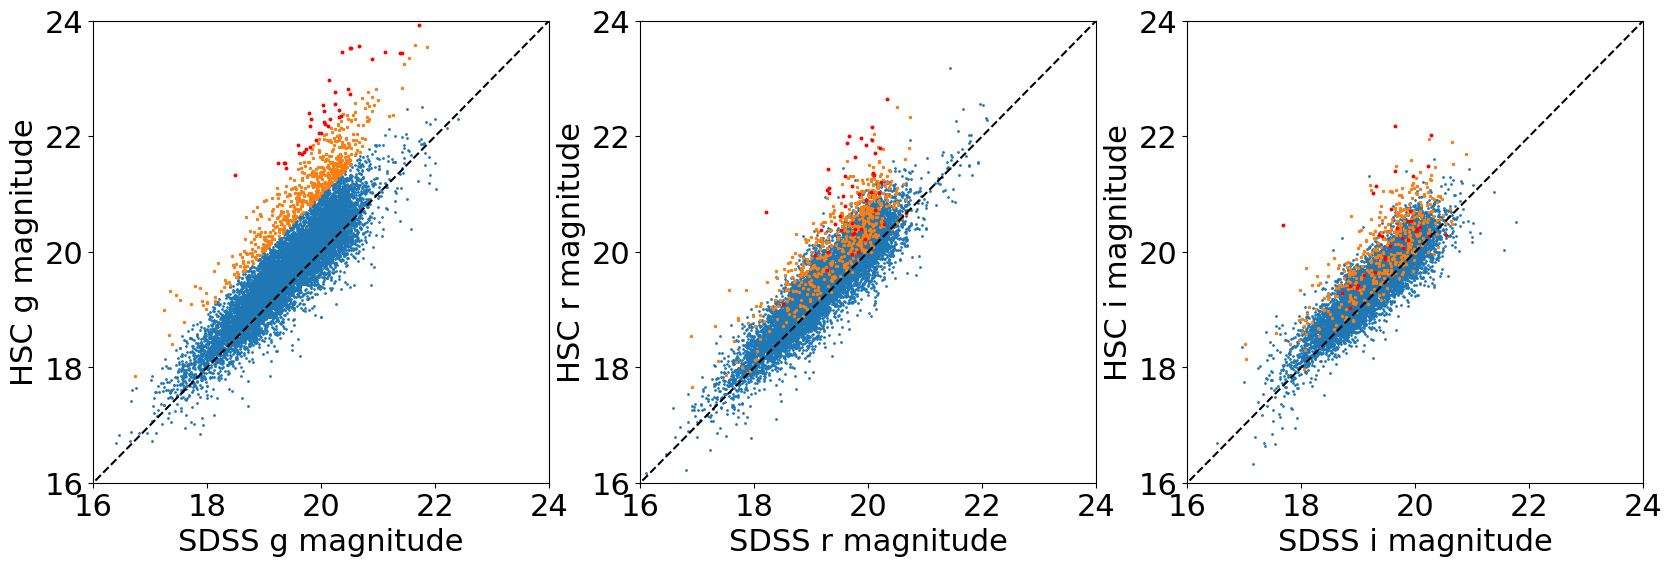

In [175]:
plt.figure(figsize=(20,6))
plt.subplot(131)

plt.scatter(matched_array_filtered[:,2],matched_array_filtered[:,8+2],s=1)
plt.scatter(matched_array_filtered[:,2][(matched_array_filtered[:,8+2]-matched_array_filtered[:,2])>1],matched_array_filtered[:,8+2][(matched_array_filtered[:,8+2]-matched_array_filtered[:,2])>1],s=2)
plt.scatter(matched_array_filtered[:,2][(matched_array_filtered[:,8+2]-matched_array_filtered[:,2])>2],matched_array_filtered[:,8+2][(matched_array_filtered[:,8+2]-matched_array_filtered[:,2])>2],s=3,color='red')

plt.xlabel('SDSS g magnitude')
plt.ylabel('HSC g magnitude')
plt.plot(range(0,100),range(0,100),color='black',ls='--')
plt.xlim(16,24)
plt.ylim(16,24)

plt.subplot(132)

plt.scatter(matched_array_filtered[:,4],matched_array_filtered[:,8+4],s=1)
plt.scatter(matched_array_filtered[:,4][(matched_array_filtered[:,8+2]-matched_array_filtered[:,2])>1],matched_array_filtered[:,8+4][(matched_array_filtered[:,8+2]-matched_array_filtered[:,2])>1],s=2)
plt.scatter(matched_array_filtered[:,4][(matched_array_filtered[:,8+2]-matched_array_filtered[:,2])>2],matched_array_filtered[:,8+4][(matched_array_filtered[:,8+2]-matched_array_filtered[:,2])>2],s=3,color='red')
plt.xlabel('SDSS r magnitude')
plt.ylabel('HSC r magnitude')
plt.plot(range(0,100),range(0,100),color='black',ls='--')
plt.xlim(16,24)
plt.ylim(16,24)

plt.subplot(133)

plt.scatter(matched_array_filtered[:,6],matched_array_filtered[:,8+6],s=1)
plt.scatter(matched_array_filtered[:,6][(matched_array_filtered[:,8+2]-matched_array_filtered[:,2])>1],matched_array_filtered[:,8+6][(matched_array_filtered[:,8+2]-matched_array_filtered[:,2])>1],s=2)
plt.scatter(matched_array_filtered[:,6][(matched_array_filtered[:,8+2]-matched_array_filtered[:,2])>2],matched_array_filtered[:,8+6][(matched_array_filtered[:,8+2]-matched_array_filtered[:,2])>2],s=3,color='red')
plt.xlabel('SDSS i magnitude')
plt.ylabel('HSC i magnitude')
plt.plot(range(0,100),range(0,100),color='black',ls='--')
plt.xlim(16,24)
plt.ylim(16,24)

In [192]:
orange_sample=matched_array_filtered[(matched_array_filtered[:,8+2]-matched_array_filtered[:,2])>1]
red_sample=matched_array_filtered[(matched_array_filtered[:,8+2]-matched_array_filtered[:,2])>2]

In [199]:
orange_sample_data = np.zeros(len(orange_sample), dtype={'names':('ra (SDSS)', 'dec (SDSS)', 'g-band (SDSS)', 'g-band err (SDSS)', 'r-band (SDSS)', 'r-band err (SDSS)','i-band (SDSS)', 'i-band err (SDSS)',
                                                    'ra (HSC)', 'dec (HSC)', 'g-band (HSC)', 'g-band err (HSC)', 'r-band (HSC)', 'r-band err (HSC)','i-band (HSC)', 'i-band err (HSC)'),
                          'formats':('f8','f8','f8','f8','f8','f8','f8','f8','f8','f8','f8','f8','f8','f8','f8','f8')})

for i in range(len(orange_sample_data.dtype.names)):
    orange_sample_data[orange_sample_data.dtype.names[i]] = orange_sample[:,i]


red_sample_data = np.zeros(len(red_sample), dtype={'names':('ra (SDSS)', 'dec (SDSS)', 'g-band (SDSS)', 'g-band err (SDSS)', 'r-band (SDSS)', 'r-band err (SDSS)','i-band (SDSS)', 'i-band err (SDSS)',
                                                    'ra (HSC)', 'dec (HSC)', 'g-band (HSC)', 'g-band err (HSC)', 'r-band (HSC)', 'r-band err (HSC)','i-band (HSC)', 'i-band err (HSC)'),
                          'formats':('f8','f8','f8','f8','f8','f8','f8','f8','f8','f8','f8','f8','f8','f8','f8','f8')})

for i in range(len(red_sample_data.dtype.names)):
    red_sample_data[red_sample_data.dtype.names[i]] = red_sample[:,i]

In [201]:
np.save('/Users/nevencaplar/Documents/Variability/Silvermann/orange_sample_data',orange_sample_data)
np.save('/Users/nevencaplar/Documents/Variability/Silvermann/red_sample_data',red_sample_data)